In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import random as rm
from scipy.integrate import odeint, solve_ivp
from math import sqrt
from scipy.linalg import sqrtm

In [2]:
def survive_sp(abun,thres):
    N=0
    for i in abun:
        if i > thres:
            N += 1
    return N


def xdot(x_vec, t, K):
    x1, x2, x3, x4, x5, n1, n2 = x_vec
    g1 = rm/(K[0,0]/((1 - F1)*n1) + n2/K[0,1])
    g2 = rm/(K[1,0]/n1 + n2/K[1,1])
    g3 = rm/(K[2,0]/n1 + n2/K[2,1])
    g4 = rm/(K[3,0]/n1 + n2/K[3,1])
    g5 = rm/(K[4,0]/n1 + n2/K[4,1])
    dydl = [(g1-F)*x1,(g2-F)*x2,(g3-F)*x3,(g4-F)*x4,(g5-F)*x5,(a1-n1)*F-g1*x1-g2*x2-g3*x3-g4*x4-g5*x5,(a2-n2)*F+(F1/(1-F1))*g1*x1]
    return dydl

def xdot_v2(x_vec, t, Kv, Ts):
    x1, x2, x3, x4, x5, n1, n2 = x_vec
    #ii = 0
    #for tt in Ts[1:]:
    #    if t < tt:
    #        break
    #    else:
    #        ii=ii+1
    K=Kv[np.where(Ts<=t)[0][-1]]
    #K = Kv[ii]
    g1 = rm/(K[0,0]/((1 - F1)*n1) + n2/K[0,1])
    g2 = rm/(K[1,0]/n1 + n2/K[1,1])
    g3 = rm/(K[2,0]/n1 + n2/K[2,1])
    g4 = rm/(K[3,0]/n1 + n2/K[3,1])
    g5 = rm/(K[4,0]/n1 + n2/K[4,1])
    dydl = [(g1-F)*x1,(g2-F)*x2,(g3-F)*x3,(g4-F)*x4,(g5-F)*x5,(a1-n1)*F-g1*x1-g2*x2-g3*x3-g4*x4-g5*x5,(a2-n2)*F+(F1/(1-F1))*g1*x1]
    return dydl


def test(x_vec, t, N, T_s):
    x1,x2 = x_vec
    if t <T_s:
        return N
    else:
        return N-N
    

def split(list_a, chunk_size):
    for i in range(0, len(list_a), chunk_size):
        if i != 0:
            yield list_a[i-1:i + chunk_size]
        else:
            yield list_a[i:i + chunk_size]

In [3]:
#parameters
rm = 1.2
F=1.03
C = 5
C1 = C2 = C3 = C4 = C5 = C

F1 = 0.1

k11=0.1
k21=0.6
k31 = 0.7
k41 = 0.8
k51 = 0.9

k12 = 1/(C1 - k11/(1 - F1))
k22 = 1/(C2 - k21/(1))
k32 = 1/(C3 - k31/(1))
k42 = 1/(C4 - k41/(1))
k52 = 1/(C5 - k51/(1))

K = np.array([[k11,k12],[k21,k22],[k31,k32],[k41,k42],[k51,k52]])

#apply constraint
a1=14
a2=0

In [15]:
end_time = 1500 #length of simulation (4)
time_points = end_time*100+1
t=np.linspace(0,end_time,time_points)
Reshuffle = np.array([0.2,2,20,200,2000])*time_points/end_time #time_points has to be divisible by reshuffle



Sig = [1/10**i for i in range(2,10)]
Num_of_surv=[]
Num_of_surv_err = []
sample_size = 100
Num_of_sp = 5
surviving_sp = [] # surviving_sp[Sig, Reshuffle, sample_size]

data_size=1
for sig in Sig:
    print(sig)
    surviving_sp_sig = []

    for r in Reshuffle:
        print(Reshuffle, r)
        surviving_sp_r = []
        Time_slice = np.arange(0,end_time, r/(time_points/end_time)) #bug end_time -> time_points
        K_vary = [np.zeros((2,2)) for i in range(len(Time_slice))]
        for sam in range(sample_size):
            print(sam)
            TooLarge = True
            while (TooLarge):
                init_cond = [0.3,0.3,0.3,0.3,0.3,a1,a2]
                x0 = init_cond
                delta_k = np.array([np.random.multivariate_normal([0,0],[[0,0],[0,0]],data_size).tolist()[0] for i in range(Num_of_sp)])
                for i in range(len(K_vary)):
                    allpositive = False
                    while (not allpositive):
#                         delta_k = np.array([np.random.multivariate_normal([0,0],[[sig*20,0],[0,sig*0.2]],data_size).tolist()[0] for i in range(Num_of_sp)])
                        delta_k = np.array([np.random.multivariate_normal([0,0],[[sig,0],[0,sig]],data_size).tolist()[0] for i in range(Num_of_sp)])
                        allpositive = np.all(K+delta_k>0)
                    K_vary[i] = K+delta_k
                

                solution=odeint(xdot_v2,x0, t, args=(K_vary,Time_slice))
             
                for i in solution:
                    TooLarge = any(i>10e5) or any(i<-0.1)
                    if(TooLarge):
                        break

            surviving_sp_r.append(survive_sp(solution[-1,0:5],10e-5))

            
        surviving_sp_sig.append(surviving_sp_r)
    surviving_sp.append(surviving_sp_sig)
    
surviving_sp=np.array(surviving_sp)
            

0.01
[2.00001333e+01 2.00001333e+02 2.00001333e+03 2.00001333e+04
 2.00001333e+05] 20.000133333333334
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


KeyboardInterrupt: 

In [ ]:
surv_Res_mean = [[np.sum(i)/ len(i)for i in surviving_sp[:,int(res),:]] for res in range(len(Reshuffle))]
surv_Res_err = [[np.std(i,ddof=1)/ np.sqrt(len(i)) for i in surviving_sp[:,int(res),:]] for res in range(len(Reshuffle))]

In [ ]:
surv_Res_mean

In [8]:
# np.savetxt("noise_in_k_kixed_period_2_data_copy1.txt",surv_Res_mean)
# np.savetxt("noise_in_k_kixed_period_2_data_copy1.txt",surv_Res_err)

In [16]:
x = np.loadtxt("noise_in_k_kixed_period_2_data_copy1_mean.txt")
ex = np.loadtxt("noise_in_k_kixed_period_2_data_copy1_err.txt")

In [20]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family']='Times New Roman'

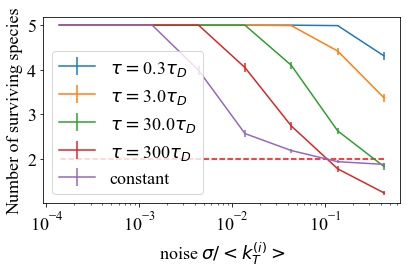

In [23]:
for i in range(5):
    plt.errorbar(np.sqrt(Sig)/np.mean(K[:,1]),x[i],yerr=ex[i])

plt.legend([r'$\tau=$'+str(round(0.2/0.67,1))+r'$\tau_D$',r'$\tau=$'+str(round(2/0.67,1))+r'$\tau_D$',r'$\tau=$'+str(round(20/0.67,1))+r'$\tau_D$',r'$\tau=$'+str(round(200/0.67,1))+r'$\tau_D$','constant'])
plt.legend([r'$\tau=$'+str(round(0.2/0.67,1))+r'$\tau_D$',r'$\tau=$'+str(round(2/0.67,1))+r'$\tau_D$',r'$\tau=$'+str(30.0)+r'$\tau_D$',r'$\tau=$'+str(300)+r'$\tau_D$','constant'])

plt.plot(np.sqrt(Sig)/np.mean(K[:,1]),[2 for i in Sig],'r--')

plt.ylabel('Number of surviving species')
plt.xlabel(r'noise $\sigma/<k_T^{(i)}>$')
default_x_ticks = range(len(np.log10(np.sqrt(Sig)/np.mean(K[:,1]))))
plt.xticks(np.sqrt(Sig)/np.mean(K[:,1]),[0,2,3,4,5,6,7,8])
plt.xscale('log',base=10)

plt.gca().set_aspect('auto')

plt.tight_layout()
# plt.savefig('Fig_5b_modified.pdf')
